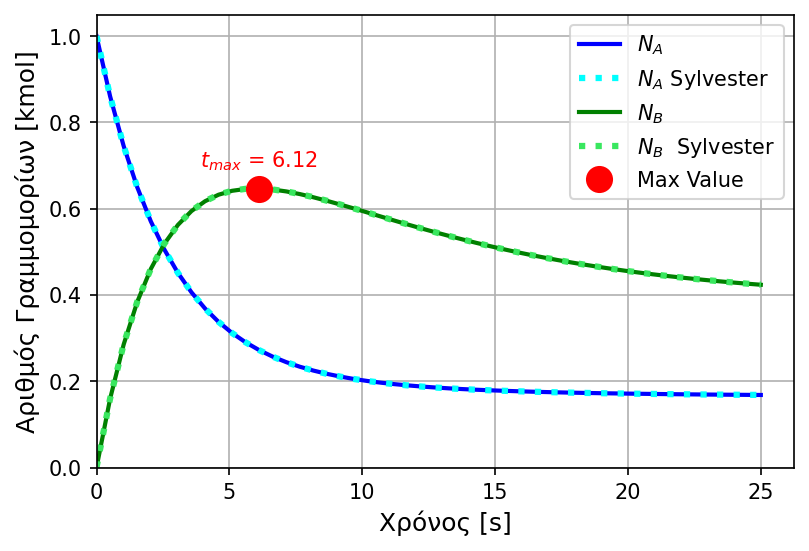

In [1]:
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def SXA_I_Example_6p3(t, n):
    # Model Parameters
    k1 = 0.35   # forward reaction constant (s^-1)
    k2 = 0.02   # reverse reaction constant (s^-1)
    k3 = 0.13   # reverse reaction constant (s^-1)
    Qo = 0.05   # Volumetric flow rate in (m^3/s)
    Qe = 0      # Volumetric flow rate out (m^3/s)

    # Concentration of species in inlet stream
    Cao = 1  # Concentration of A in inlet stream (kmol/m^3)
    Cbo = 0  # Concentration of B in inlet stream (kmol/m^3)
    Cco = 0  # Concentration of C in inlet stream (kmol/m^3)

    # Differential Equations
    dn = np.zeros(4)
    dn[0] = Qo * Cao - k1 * n[0] + k2 * n[1]     # d[NA]/dt
    dn[1] = k1 * n[0] - k2 * n[1] - k3 * n[1]    # d[NB]/dt
    dn[2] = k3 * n[1]                            # d[NC]/dt
    dn[3] = Qo - Qe                              # d[V]/dt

    return dn

# Set the time span for integration
t_span = (0, 25)  # Time range in hours
t_eval = np.linspace(0, 25, 50)  # Time points for evaluation

# Initial conditions: [A0, B0, C0, D0, V0]
initial_conditions = [1, 0, 0, 10]  # Initial values for [A], [B], [C] in kmol and volume V in m^3

# Solve the ODE system using solve_ivp
sol = solve_ivp(SXA_I_Example_6p3, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for each component
NA = sol.y[0, :]
NB = sol.y[1, :]
NC = sol.y[2, :]
V = sol.y[3, :]
time = sol.t

# Evaluate the numerical approximations derived in class
NA_Sylvester = 0.06715 * np.exp(-0.12 * time) + 0.7678 * np.exp(-0.38 * time) + 0.165
NB_Sylvester = 0.7835 * np.exp(-0.12 * time) - 1.1678 * np.exp(-0.38 * time) + 0.385

# Find the maximum value of YBA and its corresponding time
maxNB_index = np.argmax(NB)  # Index of the max value
maxNB_time = time[maxNB_index]
max_NB = NB[maxNB_index]

# Plot the results
plt.figure(dpi=150)  # Set high DPI for a large, high-resolution plot
plt.plot(time, NA, label='$N_A$', linestyle='-', color='blue', linewidth=2)
plt.plot(time, NA_Sylvester, label='$N_A$ Sylvester', linestyle=':', color='cyan', linewidth=3)
plt.plot(time, NB, label='$N_B$', linestyle='-', color='green', linewidth=2)
plt.plot(time, NB_Sylvester, label='$N_B$  Sylvester', linestyle=':', color='#39e75f', linewidth=3)
#plt.plot(time, NC, label='$N_C$', linestyle='-', color='blue', linewidth=2)

# Plot the max point with a big red "O"
plt.plot(maxNB_time, max_NB, 'ro', markersize=12, label='Max Value')  # Large red "O"
# Annotate the maximum point with the time value
plt.text(maxNB_time, max_NB + 0.05, f'$t_{{max}}$ = {maxNB_time:.2f}', color='red', ha='center', fontsize=10)

# Set the plot to start at the origin
plt.xlim(left=0)  # Start x-axis at 0
plt.ylim(bottom=0)  # Start y-axis at 0

# Customize plot with labels, title, and legend
plt.xlabel('Χρόνος [s]', fontsize=12)
plt.ylabel('Αριθμός Γραμμομορίων [kmol]', fontsize=12)
#plt.title('Number of Mol per Species', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


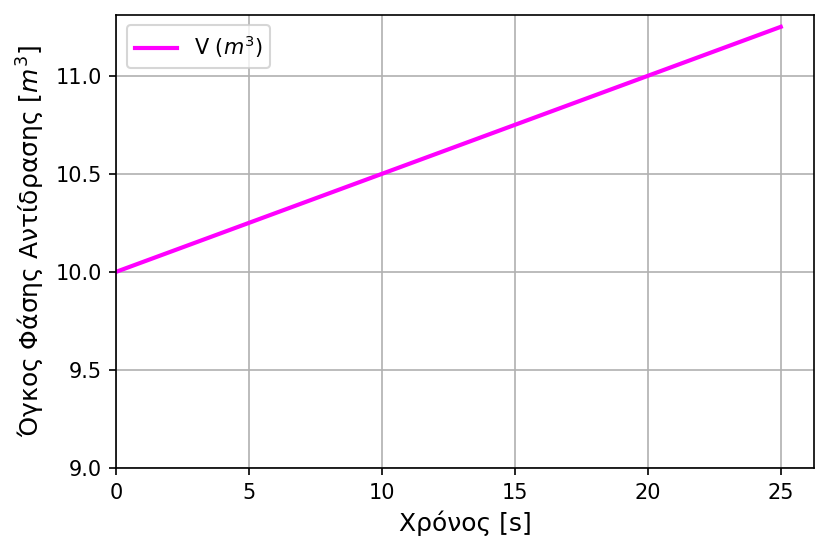

In [35]:
# Plot the evolution of reactor volume over time
plt.figure(dpi=150)  # Set high DPI for a large, high-resolution plot
plt.plot(time, V, label='V ($m^3$)', color='magenta', linestyle='-', linewidth=2)

# Set the plot to start at the origin
plt.xlim(left=0)  # Start x-axis at 0
plt.ylim(bottom=9)  # Start y-axis at 0

# Customize plot with labels, title, and legend
plt.xlabel('Χρόνος [s]', fontsize=12)
plt.ylabel('Όγκος Φάσης Αντίδρασης [$m^3$]', fontsize=12)
#plt.title('Reactor Volume Over Time', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

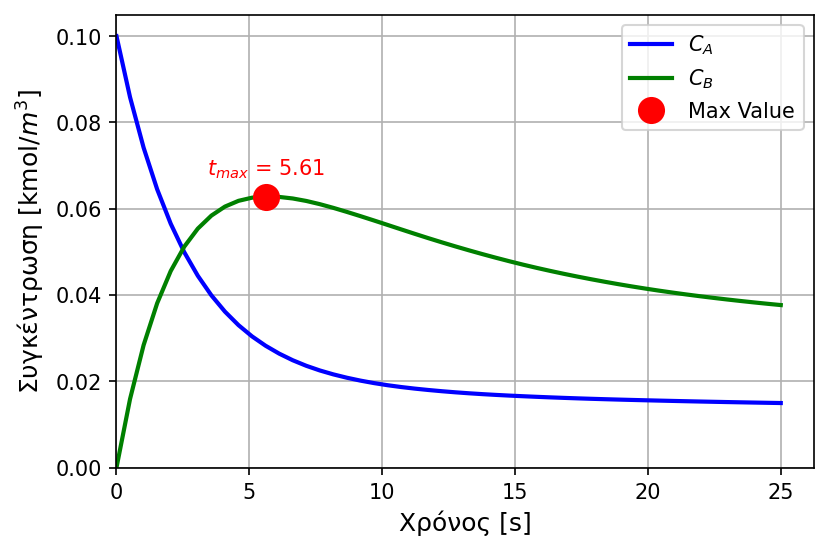

In [45]:
# Plot the concetrations
CA = NA / V
CB = NB / V

# Find the maximum value of YBA and its corresponding time
maxB_index = np.argmax(CB)  # Index of the max value
maxB_time = time[maxB_index]
max_B = CB[maxB_index]

plt.figure(dpi=150)  # Set high DPI for a large, high-resolution plot
plt.plot(time, CA, label='$C_A$', linestyle='-', color='blue', linewidth=2)
plt.plot(time, CB, label='$C_B$', linestyle='-', color='green', linewidth=2)

# Plot the max point with a big red "O"
plt.plot(maxB_time, max_B, 'ro', markersize=12, label='Max Value')  # Large red "O"
# Annotate the maximum point with the time value
plt.text(maxB_time, max_B + 0.005, f'$t_{{max}}$ = {maxB_time:.2f}', color='red', ha='center', fontsize=10)

# Set the plot to start at the origin
plt.xlim(left=0)  # Start x-axis at 0
plt.ylim(bottom=0)  # Start y-axis at 0

# Customize plot with labels, title, and legend
plt.xlabel('Χρόνος [s]', fontsize=12)
plt.ylabel('Συγκέντρωση [kmol/$m^3$]', fontsize=12)
#plt.title('Number of Mol per Species', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()